# BioPandas

BioPandas is a Python library to visualize and work with biological molecules as it was in a Pandas dataframe. Working with PDB file (or othe biological formats) can be cumbersome and this package make it easier.

[original project](https://biopandas.github.io/biopandas/)

In [1]:
!pip install biopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 1.6 MB/s eta 0:00:00


## Simple example

In [3]:
# Initialize a new PandasPdb object
# and fetch the PDB file from rcsb.org
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().fetch_pdb('3eiy')
ppdb.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,2,,...,2.527,54.656,-1.667,1.0,52.73,,,N,NaN,611
1,ATOM,2,,CA,,SER,,A,2,,...,3.259,54.783,-0.368,1.0,52.54,,,C,NaN,612
2,ATOM,3,,C,,SER,,A,2,,...,4.127,53.553,-0.105,1.0,52.03,,,C,NaN,613
3,ATOM,4,,O,,SER,,A,2,,...,5.274,53.451,-0.594,1.0,52.45,,,O,NaN,614
4,ATOM,5,,CB,,SER,,A,2,,...,2.273,54.944,0.792,1.0,52.69,,,C,NaN,615


In [6]:
ppdb.df['ATOM'].columns

Index(['record_name', 'atom_number', 'blank_1', 'atom_name', 'alt_loc',
       'residue_name', 'blank_2', 'chain_id', 'residue_number', 'insertion',
       'blank_3', 'x_coord', 'y_coord', 'z_coord', 'occupancy', 'b_factor',
       'blank_4', 'segment_id', 'element_symbol', 'charge', 'line_idx'],
      dtype='object')

In [12]:
ppdb.df


{'ATOM':      record_name  atom_number blank_1 atom_name alt_loc residue_name blank_2  \
 0           ATOM            1                 N                  SER           
 1           ATOM            2                CA                  SER           
 2           ATOM            3                 C                  SER           
 3           ATOM            4                 O                  SER           
 4           ATOM            5                CB                  SER           
 ...          ...          ...     ...       ...     ...          ...     ...   
 1325        ATOM         1326                CG                  LYS           
 1326        ATOM         1327                CD                  LYS           
 1327        ATOM         1328                CE                  LYS           
 1328        ATOM         1329                NZ                  LYS           
 1329        ATOM         1330               OXT                  LYS           
 
      chain_id  re

In [9]:
import pandas as pd
import networkx as nx
# Create a graph
df = ppdb.df['ATOM']
G = nx.Graph()

# Add nodes with attributes
for i, row in df.iterrows():
    G.add_node(row['atom_number'],
               pos=(row['x_coord'], row['y_coord'], row['z_coord']),
               atom=row['element_symbol'])

# Define bond criteria (simple example: based on spatial distance)
# You would need a more sophisticated method depending on your case
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i < j:
            dist = ((row1['x_coord'] - row2['x_coord'])**2 +
                    (row1['y_coord'] - row2['y_coord'])**2 +
                    (row1['z_coord'] - row2['z_coord'])**2)**0.5
            if dist < 1.6:  # Example threshold for a bond
                G.add_edge(row1['atom_number'], row2['atom_number'])

# Define colors based on atom type
color_map = {
    'N': 'blue',
    'C': 'black',
    'O': 'red',
    'S': 'green'
    # add more if needed
}

colors = [color_map[data['atom']] for _, data in G.nodes(data=True)]

# Get positions (2D projection)
pos = {node: (data['pos'][0], data['pos'][1]) for node, data in G.nodes(data=True)}

# Draw the graph
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=500)
plt.show()

KeyError: 'S'

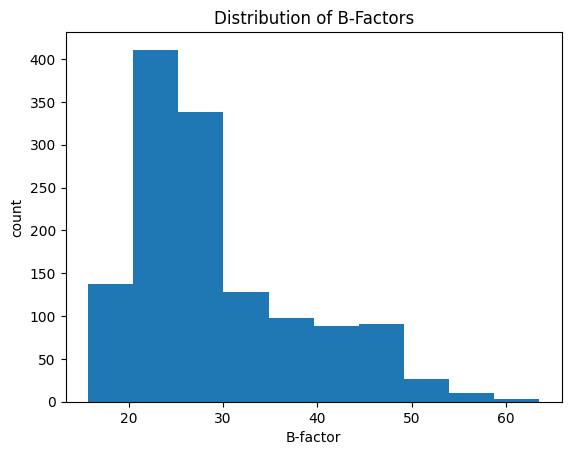

In [5]:
import matplotlib.pyplot as plt
ppdb.df['ATOM']['b_factor'].plot(kind='hist')
plt.title('Distribution of B-Factors')
plt.xlabel('B-factor')
plt.ylabel('count')
plt.show()


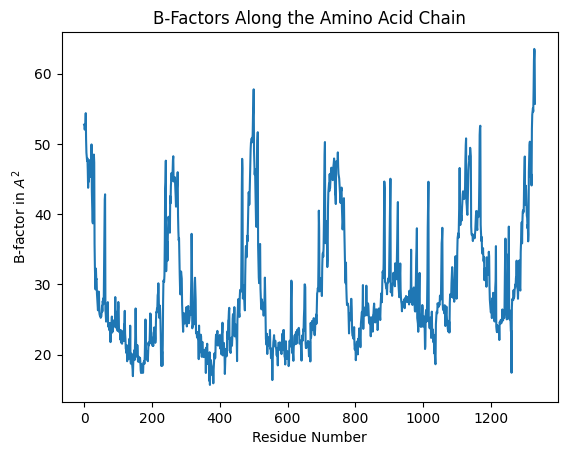

In [13]:
ppdb.df['ATOM']['b_factor'].plot(kind='line')
plt.title('B-Factors Along the Amino Acid Chain')
plt.xlabel('Residue Number')
plt.ylabel('B-factor in $A^2$')
plt.show()


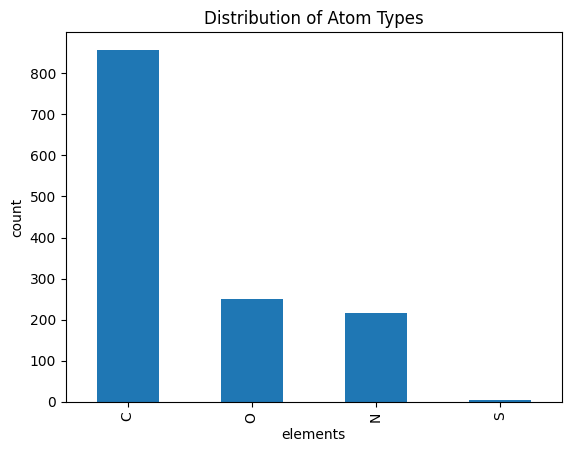

In [14]:
ppdb.df['ATOM']['element_symbol'].value_counts().plot(kind='bar')
plt.title('Distribution of Atom Types')
plt.xlabel('elements')
plt.ylabel('count')
plt.show()

In [17]:
#get the sequence
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().fetch_pdb('5mtn')
sequence = ppdb.amino3to1()
sequence_list = list(sequence.loc[sequence['chain_id'] == 'A', 'residue_name'])
''.join(sequence.loc[sequence['chain_id'] == 'A', 'residue_name'])

'SLEPEPWFFKNLSRKDAERQLLAPGNTHGSFLIRESESTAGSFSLSVRDFDQGEVVKHYKIRNLDNGGFYISPRITFPGLHELVRHYT'